# Have you ever wanted to try a public bicycle sharing system in the Bay Area?
### Do people ride more on weekends or weekdays?
### What are the duration of the bike rides?
## Lets Explore These Questions and More


# Overiew
I want to look at the duration of rides.  Riders that rode less than 60 minutes and more than 60 minutes.  Also, does the day of the week matter on length of rides and number of riders.  
# DataSet Overview
There are 150,000 observations of which I dropped 6,678 rows that had duration greater than 3 hours as this didn't provide any benefit to analysis.  I converted the duration in seconds to less than 60 minutes and greater than 60 minutes. My main point of analysis are duration, whether the rider is a customer or subscriber and how a rider rents the bike.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Load the dataset
**the file is a clean file created in the explanatory section inorder to keep this section mostly visuals**

In [2]:
#file to read in
file = 'bayWheelsDataCleaned.pkl'
#read in dataset which is a csv file 
df_bike = pd.read_pickle(file)



In [3]:
#set the figure to notebook for all plots
sb.set_context('talk')

In [4]:
#day of week list starting with monday
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# riders riding less than 60 minutes (1 hour)
df_mins = df_bike.query('duration_less60_mins > 0')
#create a series of just minutes less than 60
mins=df_mins['duration_less60_mins']

# riders riding more than 1 hour (60 minutes or greater)
df_hours = df_bike.query('duration_greater60_mins > 0')
#create a series of just minutes 1 hour or more
hours = df_hours['duration_greater60_mins']



# Distribution for riders who rode < 60 minutes
 - 8-10 minutes holds the largest number of riders
 - Then decreases sharply


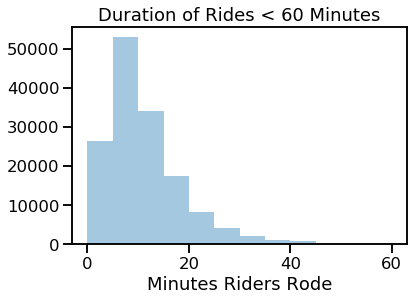

In [5]:
#lets check riders that rode for less than 1 hour


#create the bin range
bins = np.arange(0, 65, 5)
# Create a distplot 
sb.distplot(mins,
             kde=False,
             
             bins=bins)

plt.xlabel('Minutes Riders Rode')
plt.title('Duration of Rides < 60 Minutes')
# Display the plot
plt.show();

# Distribution of riders who rode > 60 minutes
 - About 60 - 70 minutes holds the most number of riders
 - Then drops sharply

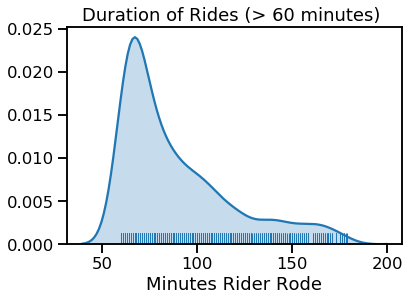

In [6]:
#another look at duration in hours
#create distplot without histogram and use a rugplot
sb.distplot(hours,
            hist=False,
            rug=True,
            kde_kws={'shade':True})

plt.xlabel('Minutes Rider Rode')
plt.title('Duration of Rides (> 60 minutes) ')
#display the plot           
plt.show();

# What day do you think gets the most use out of the bikes?

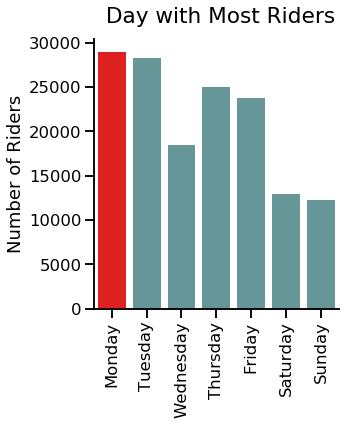

In [7]:
#determine maximum value and color that red
clrs = ['cadetblue' if (x < max(df_bike.dow.value_counts()) ) else 'red' for x in df_bike.dow.value_counts() ]

g=sb.catplot(x='dow',data=df_bike,kind='count',palette=clrs,order=dow_order)
    
#title and axes labels/spaced out to move title over
g.fig.suptitle('         Day with Most Riders',y=1.03)
g.set(xlabel='',
      ylabel='Number of Riders')

#rotate the days of week to fit nicely
plt.xticks(rotation=90)
#display the plot
plt.show()
            

## I was shocked also.  Monday with Tuesday close behind had the most riders

# Weekday vs Weekend riders.
> Weekday - **125,000**
<br>
> Weekend - **25,000**

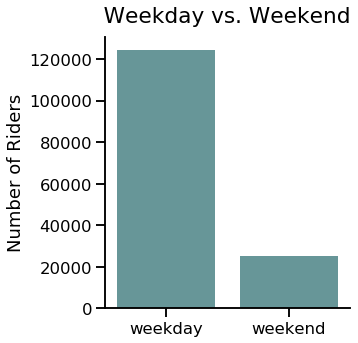

In [8]:

#countplot to compare
g=sb.catplot(x='day',data=df_bike,kind='count',color='cadetblue')

#title and axes
g.fig.suptitle('           Weekday vs. Weekend',y=1.03)
g.set(xlabel='',
     ylabel='Number of Riders')

#display plot
plt.show()


# How many people rode < 60 minutes compared to > 60 minutes?
 - **149,000** people rode less than 60 minutes
 - **1,000** people rode more than 60 minutes. 

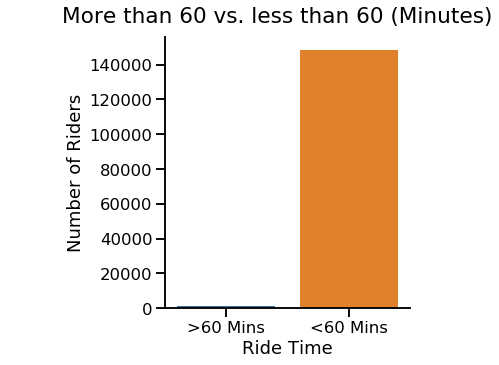

In [9]:
#create the countplot to compare >60 minute riders to <60 minute riders
g=sb.catplot(x='ride_time',data=df_bike,kind='count')

#title and axes
g.fig.suptitle('        More than 60 vs. less than 60 (Minutes)',y=1.03)
g.set(xlabel ='Ride Time',
      ylabel='Number of Riders')

plt.show()




# Rental Access Method to Unlock the Bikes
 - **NA**      Not Available in data, but I presume it is a kiosk based on research
 - **App**     The BayWheel/Lyft app
 - **Clipper** The local transit card for the Bay Area
 
<br> **The majority of riders use NA (Possibly kiosks with one time payment)**
 <br>**The reason can be the bike share is used by mostly tourists**
 <br>**More research is needed to get these answers**

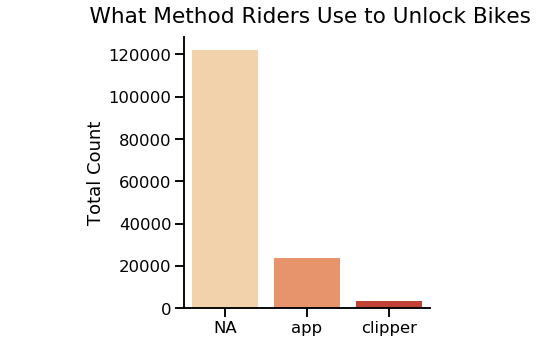

In [10]:
#create a bar plot for the mean in minutes
g=sb.catplot(x='rental_access_method',y=None,data=df_bike,palette='OrRd',ci=None,kind='count')
#title and axes
g.fig.suptitle('            What Method Riders Use to Unlock Bikes',y=1.03)
g.set(xlabel='',
     ylabel= 'Total Count')
#display
plt.show()

# Customers vs. Subscribers - Who rode more when < 60 minutes
 - **Customers** (pay by rental) out distanced the **Subscribers** (pay monthly/yearly)
 - **The longer rides were on the weekend as expected**


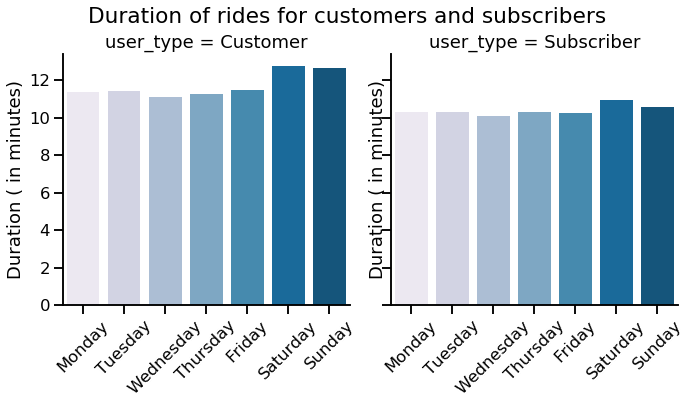

In [11]:
#create a barchart for each user - customer and subscriber
#using dow_order created above for correct order of days
g=sb.catplot(x='dow',y='duration_less60_mins',data=df_mins,kind='bar',
             ci=None,order=dow_order,col='user_type',palette='PuBu')
#title and axis labels
g.fig.suptitle("Duration of rides for customers and subscribers",y=1.02)
g.set(xlabel="",
      ylabel="Duration ( in minutes)")

#rotate the days of week to fit better
g.set_xticklabels(rotation=45)
#display
plt.show()


# Customers vs. Subscribers - Who rode more when > 60 minutes
 - This was closer with **Customers** slighlty ahead of **Subscribers**
 - The longest rides were on Tuesday for both Subscribers and Customers

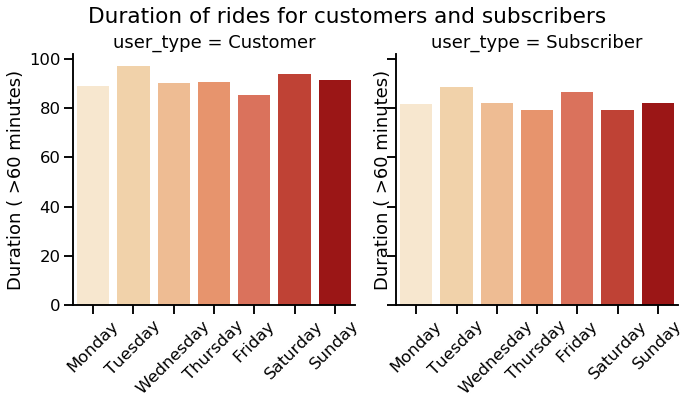

In [12]:
#create a barchart for each user - customer and subscriber for hours
#using dow_order created above for correct order of days and the time frame for hours > 0 and less than 11
g=sb.catplot(x='dow',y='duration_greater60_mins',data=df_hours,kind='bar',
             ci=None,order=dow_order,col='user_type',palette='OrRd')
#title and axis labels
g.fig.suptitle("Duration of rides for customers and subscribers",y=1.02)
g.set(xlabel="",
      ylabel="Duration ( >60 minutes)")

#rotate the days of week to fit better
g.set_xticklabels(rotation=45)
#display
plt.show()


# Summary of Findings (Numbers are rounded):
> ### The number of weekday riders are 125,000  vs. 25,000 for weekend riders
> ### Riders riding less than 60 minutes(with most being in the 8-10 min range) are 149,000 vs. 1,000 for greater than 60 minutes
> ### The rental access.  "NA"(Kiosk) is 125,000,  app is 27,000 and local clipper card is 3,000
> ### Being a customer or a subscriber didn't matter as far as riding duration on average
> ### It appears bike shares are mainly used for getting around town in short distances.

